### Conceptos básicos

La probabilidad de A dado B significa la probabiliad de que pase A una vez que ya sabemos que B pasó, se usa la notación
$$P(A|B)=\frac{P(A\cap B)}{P(B)}$$
Si despejamos podemos obtener $$P(A\cap B)=P(A|B)P(B)$$
$$P(B\cap A)=P(B|A)P(A)$$
Recordemos que dos eventos son independientes sii
$$P(A|B)=P(A)$$
Fijándonos en la ecuación de arriba eso resulta en 
$$P(A\cap B)=P(A)P(B)$$
El teorema de Bayes nos dice que 
$$P(A|B)=\frac{P(B|A)P(A)}{P(B)}$$

Un caso particular de ese teorema es cuando $A=A_1$ pertenece a una partición y podemos hacer
$$P(A_1|B)=\frac{P(B|A_1)P(A_1)}{P(B|A_1)P(A_1)+\cdots+P(B|A_n)P(A_n)}$$

---

#### Ejemplo cajas de galletas
Caja 1= 10 galletas de chocolate \\
Caja 2= 5 galletas de chocolate y 5 galletas de coco \\
Vamos a tomar una galleta sin ver y queremos obtener lo siguiente.

$P(Caja1 | Chocolate)$ \\
La probabilidad que la galleta obtenida sea de la caja1 si sabemos que es de chocolate


$P(Caja1 | Chocolate)=\frac{P(Chocolate|Caja1)P(Caja1)}{P(Chocolate)}$ \\
$P(Chocolate | Caja1)=1$ \\
$ P(Chocolate|Caja2)=1/2$ \\
La siguientes probas son 1/2 porque la galleta la tomamos de una caja sin ver \\
$P(Caja1)=1/2$ \\
$P(Caja2)=1/2$ \\
$P(Chocolate)=P(Chocolate|Caja1)P(Caja1) + P(Chocolate|Caja2)P(Caja2)=1*1/2+1/2*1/2=3/4$


$P(Caja1 | Chocolate)=\frac{1*1/2}{3/4}=4/6=2/3$

---

### Terminología Bayes
$$P(A|B)=\frac{P(B|A)P(A)}{P(B)}$$
$P(A)$ priori. \\
$P(B|A)$ likelihood. \\
$P(B)$ marginal. \\
$P(A|B)$ posteriori. \\

In [ ]:
import numpy as np

In [ ]:
# Ejemplo de las galletas usando python
# priors = Probabilidad de que la galleta venga de cada caja
# likelihoods = Probabilidad de que la galleta sea de chocolate si la saque de cada caja
priors = [1/2, 1/2]
likelihoods = [1, 1/2]
#np.multiply(priors, likelihoods)=[1*1/2, 1/2*1/2]
def bayes(priors, likelihoods):

  #La marginal la calculamos como P(Chocolate|Caja1)P(Caja1) + P(Chocolate|Caja2)P(Caja2)
  #Es decir sumando el producto de priors por likelihoods emtrada por entrada
  marginal = sum(np.multiply(priors, likelihoods))

  #El numerador es una lista de la forma P(Chocolate|Cajai)P(Cajai) que usaremos para
  # calcular P(Cajai|Chocolate), aunque nosotros tenemos interés específicamente en
  # P(Caja1|Chocolate)
  num = np.multiply(priors, likelihoods)
  posteriori = np.divide(num, marginal)
  return posteriori

In [ ]:
# resultado = [proba de que sea caja 1 dado chocolate, proba de que sea caja 2 dado chocolate]
bayes(priors, likelihoods)

array([0.66666667, 0.33333333])

### Bayes en medicina
Primero veamos terminología que no será de utilidad un poco más adelante

![Sensib/especif](https://pbs.twimg.com/media/EV-bnxjUwAcZW_B.jpg)

Supongamos que tenemos una prueba que nos ayuda a identificar si una persona ha consumido o no alguna droga específica. \\
Sabiendo lo de arriba vamos a crear una función que nos ayude a calcular la probabilidad de que una persona consumiera drogas, dado que la prueba sale positiva, elgunas probabilidades importantes son:

---
$P(usuario | positivo)=\frac{P(positivo|usuario)P(usuario)}{P(postivo)}$ \\
$P(positivo)$ = P(positivo | usuario)*P(usuario) + P(positivo | no\; usuario)*P(no\; usuario) \\
$P(positivo | usuario)=$ Sensibilidad \\
$P(positivo | no\; usuario)=1-P(negativo | no\;usuario)$ \\
$P(negativo | no\;usuario)$ =Especificidad \\
$P(usuario)=$ Prevalencia


In [ ]:
# sensibilidad = porcentaje reales positivos
# especifidad = porcentaje de reales negativos
# prevalencia = que tan probable es que una persona sea usario al hacerse la prueba

# El verbose será usado solo para ver si queremos o no el print al correr la función
# Flag va a ser qué probabilidad de que sea usuario mínima queremos para afirmar que es usuario(print)
def proba_usuario(flag = 0.5, sensibilidad = 0.99, especificidad = 0.99, preval = 0.01, verbose = False):
  
  prob_usuario = preval
  prob_no_usuario = 1 - preval

  prob_positivo_usuario = sensibilidad
  prob_negativo_no_usuario = especificidad
  prob_negativo_usuario = 1-sensibilidad
  prob_positivo_no_usuario = 1-especificidad

  #Aplicamos probabilidad global (desglosamos la proba como arriba)
  prob_positivo = prob_positivo_usuario*prob_usuario + prob_positivo_no_usuario*prob_no_usuario

  #Es la parte de arriba de la fracción que escribimos arriba en el teorema de bayes
  num = prob_positivo_usuario*prob_usuario
  proba_posteriori = num/prob_positivo

  if verbose:
    if proba_posteriori>flag:
      print('Si es usuario! Agarralo')
    else:
      print('Dale calma fue falso positivo')
  return proba_posteriori

In [ ]:
import matplotlib.pyplot as plt

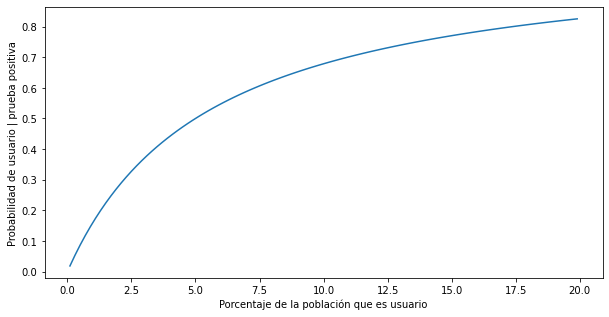

In [ ]:
# Vamos a ver qué pasa si dejamos la sensibilidad y especificidad fija y variamos la prevalencia
# Lo que estamos viendo en el eje y es: si la prueba sale positiva entonces qué tan probable es que
# efectivamente sea usuario
#Recordando que la prevalencia es la probabilidad de que la persona sea usuario antes de ver los resultados
# de la prueba
probabilidades = []
prevalencias = []
for preva in [i*.001 for i in range(1,201,2)]:
    prevalencias.append(preva*100)
    p=proba_usuario(sensibilidad = 0.95, especificidad = 0.95, preval = preva)
    probabilidades.append(p)
plt.figure(figsize=(10, 5),facecolor='w')
plt.plot(prevalencias, probabilidades)
plt.xlabel('Porcentaje de la población que es usuario')
plt.ylabel('Probabilidad de usuario | prueba positiva')
plt.show()

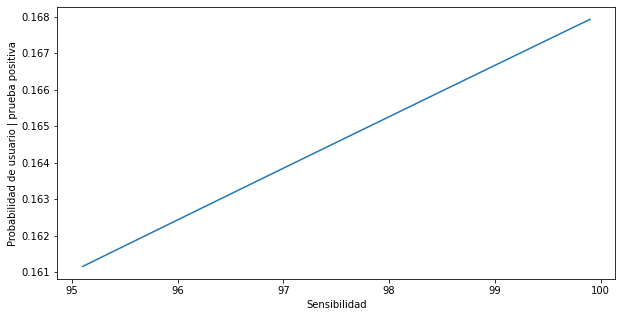

In [ ]:
# Igual que arriba pero ahora fijamos la especificidad y prevalencia y variamos la sensibilidad
# Recordando que las sensibilidad es que si alguien es usuario qué tan probable es que la prueba salga positivo
probabilidades = []
sensibilidades = []
for sensib in [i*.001+0.95 for i in range(1,51,2)]:
    sensibilidades.append(sensib*100)
    p=proba_usuario(sensibilidad = sensib, especificidad = 0.95, preval = 0.01)
    probabilidades.append(p)
plt.figure(figsize=(10, 5),facecolor='w')
plt.plot(sensibilidades, probabilidades)
plt.xlabel('Sensibilidad')
plt.ylabel('Probabilidad de usuario | prueba positiva')
plt.show()

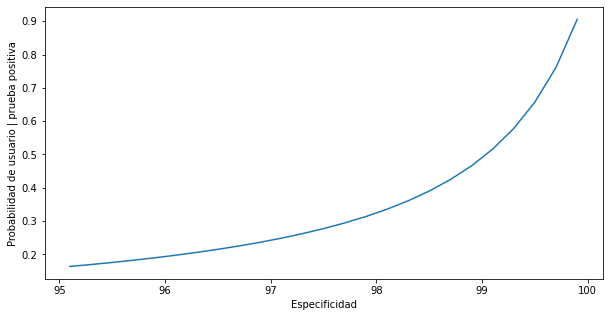

In [ ]:
# Igual que arriba pero ahora fijamos la sensibilidad y prevalencia y variamos la especificidad
# Recordando que las especificidad es que si alguien no es usuario qué tan probable es que la prueba salga negativo
probabilidades = []
especificidades = []
for especif in [i*.001+0.95 for i in range(1,51,2)]:
    especificidades.append(especif*100)
    p=proba_usuario(sensibilidad = 0.95, especificidad = especif, preval = 0.01)
    probabilidades.append(p)
plt.figure(figsize=(10, 5),facecolor='w')
plt.plot(especificidades, probabilidades)
plt.xlabel('Especificidad')
plt.ylabel('Probabilidad de usuario | prueba positiva')
plt.show()

In [ ]:
# Hicimos una prueba y salió positivo, entonces según lo parámetros iniciales hay
# un 8% de probabilidad que sea usuario
p1 = proba_usuario(sensibilidad=0.95, especificidad=0.95, preval=0.005, verbose=True)
p1

Dale calma fue falso positivo


0.08715596330275223

In [ ]:
# Se hace segunda prueba sabiendo que nuestra prevalencia ahora cambia porque
# ya tuvimos una prueba positiva entonces la probabilidad de que sea usuario antes
# de la segunda prueba es de 8% y no de .5% como era inicialmente.
# Si esta segunda prueba salió postivo entonces hay un 64% de probabilidad que sea usuario
p2 = proba_usuario(sensibilidad = 0.95, especificidad=0.95, preval=p1, verbose=True)
p2

Si es usuario! Agarralo


0.6446428571428567

Estadística bayesiana en la vida real trata de estimar algún parámetro con una distribución conocida usando muestras observadas para actualizar la distribución de dicho parámetro

Suppose we have just launched an online store that sells fidget spinners, and we are trying to estimate what percentage of visitors to our online store will make a purchase.

Prior to seeing any traffic or purchase data, we have no idea what to expect so we will start with the assumption that all percentages are equally likely. This is called a uniform prior because we can use a uniform distribution to represent the fact that every rate has an equal chance of being the actual rate of purchase. To set this up in Python, we are going to use Numpy to generate a uniform distribution from 100,000 random draws of numbers between 0 and 1.

Binomial(n,p) \\
En este caso nuestro parámetro que estimaremos es p, ya depende del programmador saber qué siginifica, en caso de la binomial es la probabilidad de que un usuario compre.

In [ ]:
import pandas as pd

In [ ]:
# Como no tenemos idea de normalmente cómo es la probabilidad de 
# que un usuario compre generamos 100000 muestras de una distribución uniforme(0,1)
# Es decir que cada muestra tiene la misma probabilidad de caer en cualquier lugar entre
# 0 y 1
n_draws=100000
prior = pd.Series(np.random.uniform(0,1, size=n_draws))

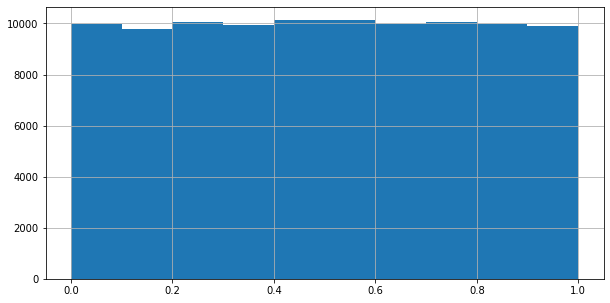

In [ ]:
# Observamos la distribución a priori (del parámetro p)
plt.figure(figsize=(10,5),facecolor='w')
prior.hist();

In [ ]:
# Hacemos una función que si le pasas un parámetro te regresa una simulación de compras
# Es decir, supongamos que un equipo de 50 bots,
# entonces programamos al equipo de forma que cada robot tiene un p% de probabilidad 
# de comprar algún artículo, después mandamos al equipo de 50 bots a la página
# y registramos efectivamente cuántos compraron algo
def generative_model(param):
  # 50 bots
  result = np.random.binomial(50, param)
  return result

In [ ]:
#Notamos el valor de prior[0]
prior[0]

0.4251877854868502

In [ ]:
# Ahora, en lugar de un equipo de bots vamos a generar 100000 equipos de 50
# bots cada uno, y a cada equipo le asignaré p=prior[i]% correspondiente,
# por ejemplo el equipo 0 tiene un prior[0]% de probabilidad de comprar
# Finalmente mandamos a comprar a todos los equipos y registramos el número
# de bots que compraron algo por equipo
compraron = list()
for p in prior:
  compraron.append(generative_model(p))

In [ ]:
# La probabilidades de comprar de los primeros 10 equipos
prior[:10]

0    0.425188
1    0.730141
2    0.467997
3    0.420670
4    0.867209
5    0.841868
6    0.406811
7    0.375267
8    0.398401
9    0.470652
dtype: float64

In [ ]:
# El número de bots que compraron de los primeros 10 equipos
compraron[:10]

[19, 39, 29, 15, 41, 46, 24, 18, 23, 26]

In [ ]:
# Observé que un día de 50 personas que visitaron, 10 personas compraron algo
# Entonces de la lista generada antes me voy a quedar solo los equipos que
# dieron resultados iguales a lo observado en la vida real, es decir
# los equipos que tuvieron exactamente 10 compras
posterior = prior[list(map(lambda x: x == 10, compraron))]

In [ ]:
# Veamos que el equipo 40 sí lo guardamos
# Aquí puede variar porque las muestras son aleatorias
# Entonces habría que cambiar el 40 en esta linea y en la que sigue
# por un equipo que sí se haya guardado
posterior

40       0.197644
42       0.139965
107      0.165992
133      0.272416
259      0.236230
           ...   
99666    0.146278
99680    0.183797
99785    0.250555
99848    0.200227
99931    0.194232
Length: 1936, dtype: float64

In [ ]:
# Si comprobamos el equipo 40 tuvo 10 compras
compraron[40]

10

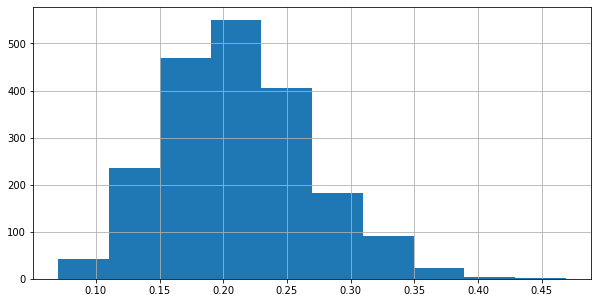

In [ ]:
# Observamos como se distribuyen las p's de los equipos que
# coincidieron con lo observado en realidad
# veamos que la mayoría está cerca de 20% pero se distribuye parecer que normal
plt.figure(figsize=(10,5),facecolor='w')
posterior.hist();

---

Supongamos que abrimos una caseta en algún punto de la república y queremos modelar el número de automóviles que pasaran cada hora, sabemos que lo podemos modelar con una distribución $Poisson(\lambda)$ (número de éxitos en un tiempo o distancia fijos). \\
 Si tuvieramos el valor de $\lambda$ podríamos sacar muchas cosas entonces trataremos de estimarlo (recordemos que $\lambda$ será el promedio de autómoviles que pasaran por hora en la caseta)

In [ ]:
# Supongamos que tenemos el registro de 100000 casetas repartidas por todo el país
# y que tenemos una lista de en promedio cuántos autómoviles pasan por cada caseta

# Nosotros como no tenemos los datos en realidad vamos a suponer que tienen
# distribución normal(15,2) y generar una muestra aleatoria, pero si se tuvieran
# se usarían esos datoss en lugar de generarlos nosotros mismos
n_draws = 100000
prior = pd.Series(np.random.normal(15, 2, size=n_draws))

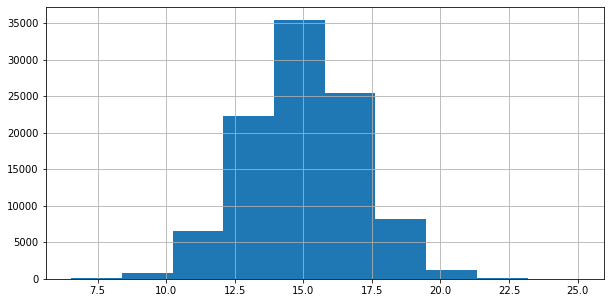

In [ ]:
# De los datos iniciales podemos ver que en promedio lo automóviles que pasarán
# por la nueva caseta cada hora se espera que sean entre 10 y 20 más específicamente
# algo cercano a 15
plt.figure(figsize=(10,5),facecolor='w')
prior.hist()
plt.show()

In [ ]:
#Podemos ver el promedio de autos por hora de las primeras 5 casetas
prior.head()

0    16.271175
1    11.895726
2    15.835444
3    15.691350
4    13.570281
dtype: float64

In [ ]:
# El promedio de autos de todas las casetas es muy cercano a 15
prior.mean()

14.992784629712586

In [ ]:
# Vamos a crear una simulación de automóviles, donde le pasaremos
# el promedio de autos que pasan por la caseta y nos regresará
# cuántos autos simuló que pasaron por ahí
def generative_model(param):
  result = np.random.poisson(param)
  return result

In [ ]:
# Aplicamos la simulación anterior a cada caseta
pasaron = list()
for p in prior:
  pasaron.append(generative_model(p))

In [ ]:
# Tomemos por ejemplo la caseta que tenía registrado que en promedio
# 16.271175 pasan cada hora(este dato puede variar cuando se vuelva a correr el colab)
prior.head(1)

0    16.271175
dtype: float64

In [ ]:
# Entonces la simulación nos regresó que en una hora pasaron 15 automóviles por la caseta
#(este dato puede variar cada que se corra la celda porque se está simulando, es decir que no es fijo)
generative_model(prior.head(1).values)

array([15])

In [ ]:
# Supongamos que abrimos la caseta y vimos que en una hora
# pasaron 8 carros, entonces nos quedaremos las casetas de arriba
# que después de simularlas nos regresaron exactamente 8 automóviles
posterior = prior[list(map(lambda x: x == 8, pasaron))]

In [ ]:
# Tenemos una serie de casetas con su promedio de automóviles por hora, ejemplo está
# la caseta 61(puede variar cada que se corra el colab)
posterior

61       13.176253
169      13.277685
191      13.679026
282      14.562981
309      13.331229
           ...    
99802    17.095977
99819    13.078977
99837    13.261959
99953    13.537263
99963    10.174656
Length: 2619, dtype: float64

In [ ]:
# Observemos las casetas 60-69 y notemos que la simulación dijo que la caseta
# 61 registró 8 autos(puede variar cada que se corra el colab)
pasaron[60:70]

[19, 8, 14, 14, 18, 16, 20, 14, 15, 11]

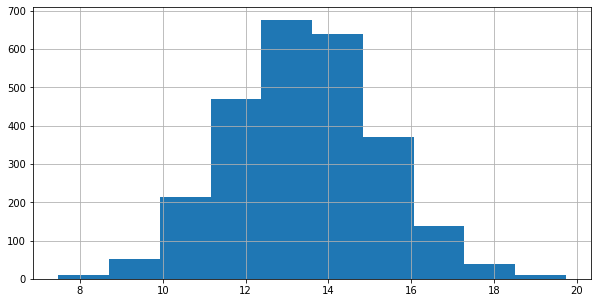

In [ ]:
# Una vez que filtramos nuestras casetas originales para quedarnos solo cuyas
# simulaciones dieron resultados iguales a la realidad vemos nuestra nueva distribución

# Entonces podemos ver que en promedio el número de carros por hora de la nueva
# caseta esperamos que esté entre 9-18, más específicamente cerca de 13
plt.figure(figsize=(10,5),facecolor='w')
posterior.hist();

In [ ]:
# Vemos una descripción de las medias que conservamos (los valores de lambda) después
# de tomar en cuenta lo observado en la nueva caseta la primer hora
posterior.describe()

count    2619.000000
mean       13.412460
std         1.804796
min         7.482631
25%        12.192331
50%        13.406187
75%        14.615621
max        19.726859
dtype: float64

Teniendo esta distribución a posteriori podemos calcular intervalos de confianza para nuestra lambda. Es decir que nuestra lambda(promedio de autos por hora) esperamos que el n% de las veces caiga entre ciertos valores

In [ ]:
# Intervalo de confianza del 50%
print('(',posterior.quantile(0.25), ', ', posterior.quantile(0.75), ')')

( 12.192330617937975 ,  14.615620920525732 )


In [ ]:
# Intervalo de confianza del 95% de dos colas
print('(',posterior.quantile(0.025), ', ', posterior.quantile(0.975), ')')

( 9.952480553411736 ,  16.957432095135275 )


In [ ]:
# Intervalo de confianza del 95% de una cola
# Notemos que -inf es un poco dudoso porque nuestro lambda debe ser por lo menos 0
print('( -inf, ', posterior.quantile(0.95), ')')

( -inf,  16.404468590415583 )


In [ ]:
# Intervalo de confianza del 95% usando la regla de 68-95-99 de las distribuciones normales
print('(',posterior.mean()-2*posterior.std(), ', ', posterior.mean()+2*posterior.std(), ')')

( 9.802868410670456 ,  17.02205121642572 )
